## Finding Periodic Orbits with Numerical Shooting

This package contains methods for numerically finding limit cycles in oscillatory solutions of ODEs.

You must first run the code block below to allow imports from the rest of this package.

In [1]:
from os import sys
sys.path.append("..")

It is necessary to first define your 1st order (or system of 1st order) ODE(s). For the following example, a predator-prey model will be used:

$\frac{dx}{dt} = x(1-x) - \frac{axy}{d+x}$,

$\frac{dy}{dt} = by(1-\frac{y}{x})$,

with parameter values of $a=1$, $d=0.1$ and $b=0.2$. This system of ODEs can be encoded as a Python function as shown in the next cell.

In [2]:
def predator_prey(X, t, params):
    '''
    Function that contains the predator-prey ODE system.

    Parameters
    ----------
    X : list
        The current state of the system (values of x and y).
    t : np.array
        Numpy array containing the times for the solution to be evaluated at.
    params : dict
        Dictionary containing the parameters required for solving the system.
    
    Returns
    -------
    X : list
        List containing the gradients computed for the given values of x, y and the 
        parameters.
    '''
    # Get parameters
    a = params['a']
    b = params['b']
    d = params['d']

    # Get system state
    x = X[0]
    y = X[1]

    # Calculate gradients
    dxdt = x*(1-x) - (a*x*y) / (d+x)
    dydt = b*y*(1-(y/x))

    X = [dxdt, dydt]
    return X

As well as defining the system of ODEs, it is also necessary to define a phase condition since otherwise there is not enough information for the numerical shooting method to produce an unique periodic orbit.

We will use the phase condition, $\frac{dx(t=0)}{dt} = 0$. This will fix the gradient of $x$ at time $t=0$ to $0$.

In [3]:
def pc_predator_prey(X0, **params):
    '''
    Function containing the phase conidition that fixes dx/dt=0 for t=0.

    Parameters
    ----------
    X0 : list
        Initial conditions of the system [x,y].
    **params:
        Optional parameters for passing to the ODE system.
        In this case, a, b and d are required but these will be defined when the
        numerical shooing occurs.

    Returns
    -------
    dxdt_at_0 : float
        The value of the gradient in the x direction at t=0. 
        This will be set to 0 as the root finding part of the shooting algorithm converges.
    '''
    dxdt_at_0 = predator_prey(X0, 0, params)[0]
    return dxdt_at_0

We are now ready to carry out the numerical shooting. This can be done as shown below.

In [4]:
from numerical_shooting import numerical_shooting
X0, T = numerical_shooting([1.3, 1.3], 10, predator_prey, pc_predator_prey, a=1, b=0.2, d=0.1)
print(X0)
print(T)

[0.5778715  0.28614888]
20.816866855928744


The numerical shooting function returns X0 which contains the initial conditions for the periodic orbit and T which is the period of the periodic orbit. To visualise this solution, the plot_orbit function can be used.

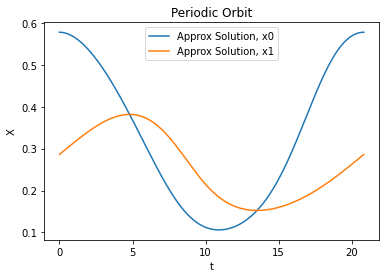

In [5]:
from plots import plot_orbit
plot_orbit(X0, T, predator_prey, 'Periodic Orbit', a=1, b=0.2, d=0.1)

This method can be used to find periodic orbits in ODE systems with arbitrary dimensions.